#KMEANS

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [16]:
df = pd.read_csv('/content/short data - Sheet1.csv')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long,Location
0,3,1106,FRAUD - CREDIT CARD / ATM FRAUD,B3,NaN,0,2023-06-14 14:15:00+00,2023,6,Wednesday,14,BLUE HILL AVE & HIAWATHA RD,42.276420,-71.093591,"(42.27641960129015, -71.09359076071786)"
1,232039,801,ASSAULT - SIMPLE,C6,186.0,0,2023-05-09 21:15:00+00,2023,5,Tuesday,21,ALLSTATE RD,42.326966,-71.061986,"(42.32696647136389, -71.06198606584843)"
2,23201284,3126,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,B2,NaN,0,2023-02-17 00:00:00+00,2023,2,Friday,0,WARREN ST & MORELAND ST\nBOSTON MA 02119\nUNI...,42.325960,-71.083301,"(42.32595954740524, -71.08330054442868)"
3,23207022,613,LARCENY SHOPLIFTING,C6,186.0,0,2023-09-02 13:15:00+00,2023,9,Saturday,13,ALLSTATE RD,42.326966,-71.061987,"(42.326965998839725, -71.06198658978266)"
4,23208079,1810,DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE,B2,280.0,0,2023-10-04 21:30:00+00,2023,10,Wednesday,21,WARREN ST,42.330486,-71.083121,"(42.33048629141013, -71.08312108029743)"


In [18]:

# Assuming you have additional columns you want to drop, for example: 'OFFENSE_DESCRIPTION', 'INCIDENT_NUMBER'
df = df.drop(columns=['OFFENSE_DESCRIPTION','DISTRICT',  'REPORTING_AREA', 'INCIDENT_NUMBER','DAY_OF_WEEK','STREET','Location'])
print(df)

     OFFENSE_CODE  SHOOTING        OCCURRED_ON_DATE  YEAR  MONTH  HOUR  \
0            1106         0  2023-06-14 14:15:00+00  2023      6    14   
1             801         0  2023-05-09 21:15:00+00  2023      5    21   
2            3126         0  2023-02-17 00:00:00+00  2023      2     0   
3             613         0  2023-09-02 13:15:00+00  2023      9    13   
4            1810         0  2023-10-04 21:30:00+00  2023     10    21   
..            ...       ...                     ...   ...    ...   ...   
994          3115         0  2023-01-05 22:01:00+00  2023      1    22   
995           801         0  2023-01-05 22:10:00+00  2023      1    22   
996          1831         0  2023-01-05 00:00:00+00  2023      1     0   
997          3502         0  2023-01-05 21:59:00+00  2023      1    21   
998          2647         0  2023-01-05 00:00:00+00  2023      1     0   

           Lat       Long  
0    42.276420 -71.093591  
1    42.326966 -71.061986  
2    42.325960 -71.083301  

In [19]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

In [20]:
import pandas as pd



# Convert specified columns to float format
columns_to_convert_2 = ['Lat', 'Long']

df[columns_to_convert_2] = df[columns_to_convert_2].astype(float)

# Print the DataFrame after conversion
print(df.dtypes)


OFFENSE_CODE                      int64
SHOOTING                          int64
OCCURRED_ON_DATE    datetime64[ns, UTC]
YEAR                              int64
MONTH                             int64
HOUR                              int64
Lat                             float64
Long                            float64
dtype: object


In [29]:
nan_cells = df.isna()

print(nan_cells)

# Drop all rows with any NaN values
df = df.dropna()
# Drop all columns with any NaN values
df = df.dropna(axis='columns')


     OFFENSE_CODE  SHOOTING  OCCURRED_ON_DATE   YEAR  MONTH   HOUR    Lat  \
0           False     False             False  False  False  False  False   
1           False     False             False  False  False  False  False   
2           False     False             False  False  False  False  False   
3           False     False             False  False  False  False  False   
4           False     False             False  False  False  False  False   
..            ...       ...               ...    ...    ...    ...    ...   
993         False     False             False  False  False  False  False   
994         False     False             False  False  False  False  False   
996         False     False             False  False  False  False  False   
997         False     False             False  False  False  False  False   
998         False     False             False  False  False  False  False   

      Long  
0    False  
1    False  
2    False  
3    False  
4    False

In [30]:
features = df[['OFFENSE_CODE','SHOOTING', 'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long']]

In [31]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [32]:
# Finding the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

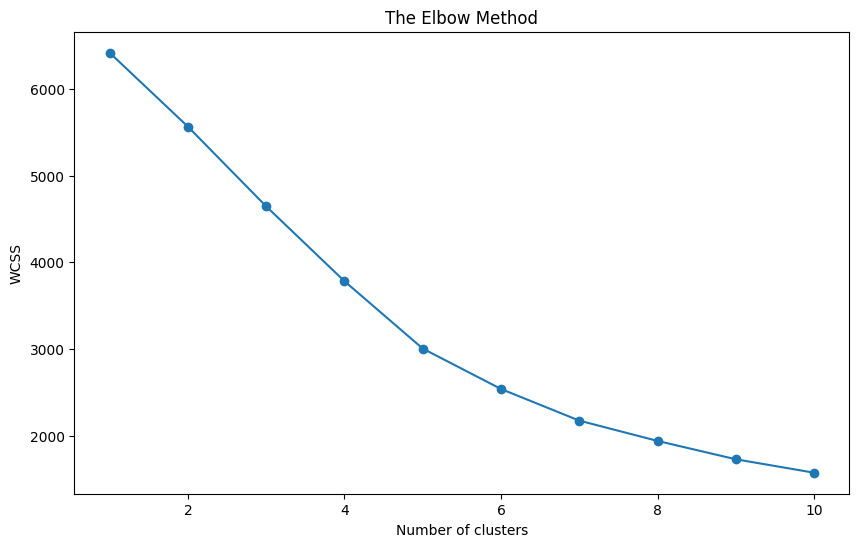

In [33]:
# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Based on the elbow graph, let's choose an optimal K value (suppose it is 3)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
# Evaluate the model using silhouette score
sil_score = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.22


In [36]:
# Adding cluster labels to the original dataframe for analysis
df['Cluster'] = labels

In [37]:
# Analyzing clusters
print(df.groupby('Cluster').mean())

         OFFENSE_CODE  SHOOTING                    OCCURRED_ON_DATE    YEAR  \
Cluster                                                                       
0         1812.493036       0.0 2023-01-08 04:42:55.988858112+00:00  2023.0   
1         2325.632911       0.0 2023-10-03 01:17:13.670886144+00:00  2023.0   
2         2670.000000       0.0           2024-01-08 12:20:00+00:00  2024.0   
3         2861.533755       0.0 2023-01-06 13:40:30.886075904+00:00  2023.0   
4         1577.500000       1.0           2023-01-10 19:38:15+00:00  2023.0   

            MONTH       HOUR        Lat       Long  
Cluster                                             
0        1.122563  11.596100  42.344743 -71.063777  
1        9.658228  10.075949  42.334029 -71.083903  
2        1.000000  12.000000  42.309718 -71.104295  
3        1.078059  12.417722  42.306365 -71.100301  
4        1.250000  13.000000  42.308871 -71.076331  


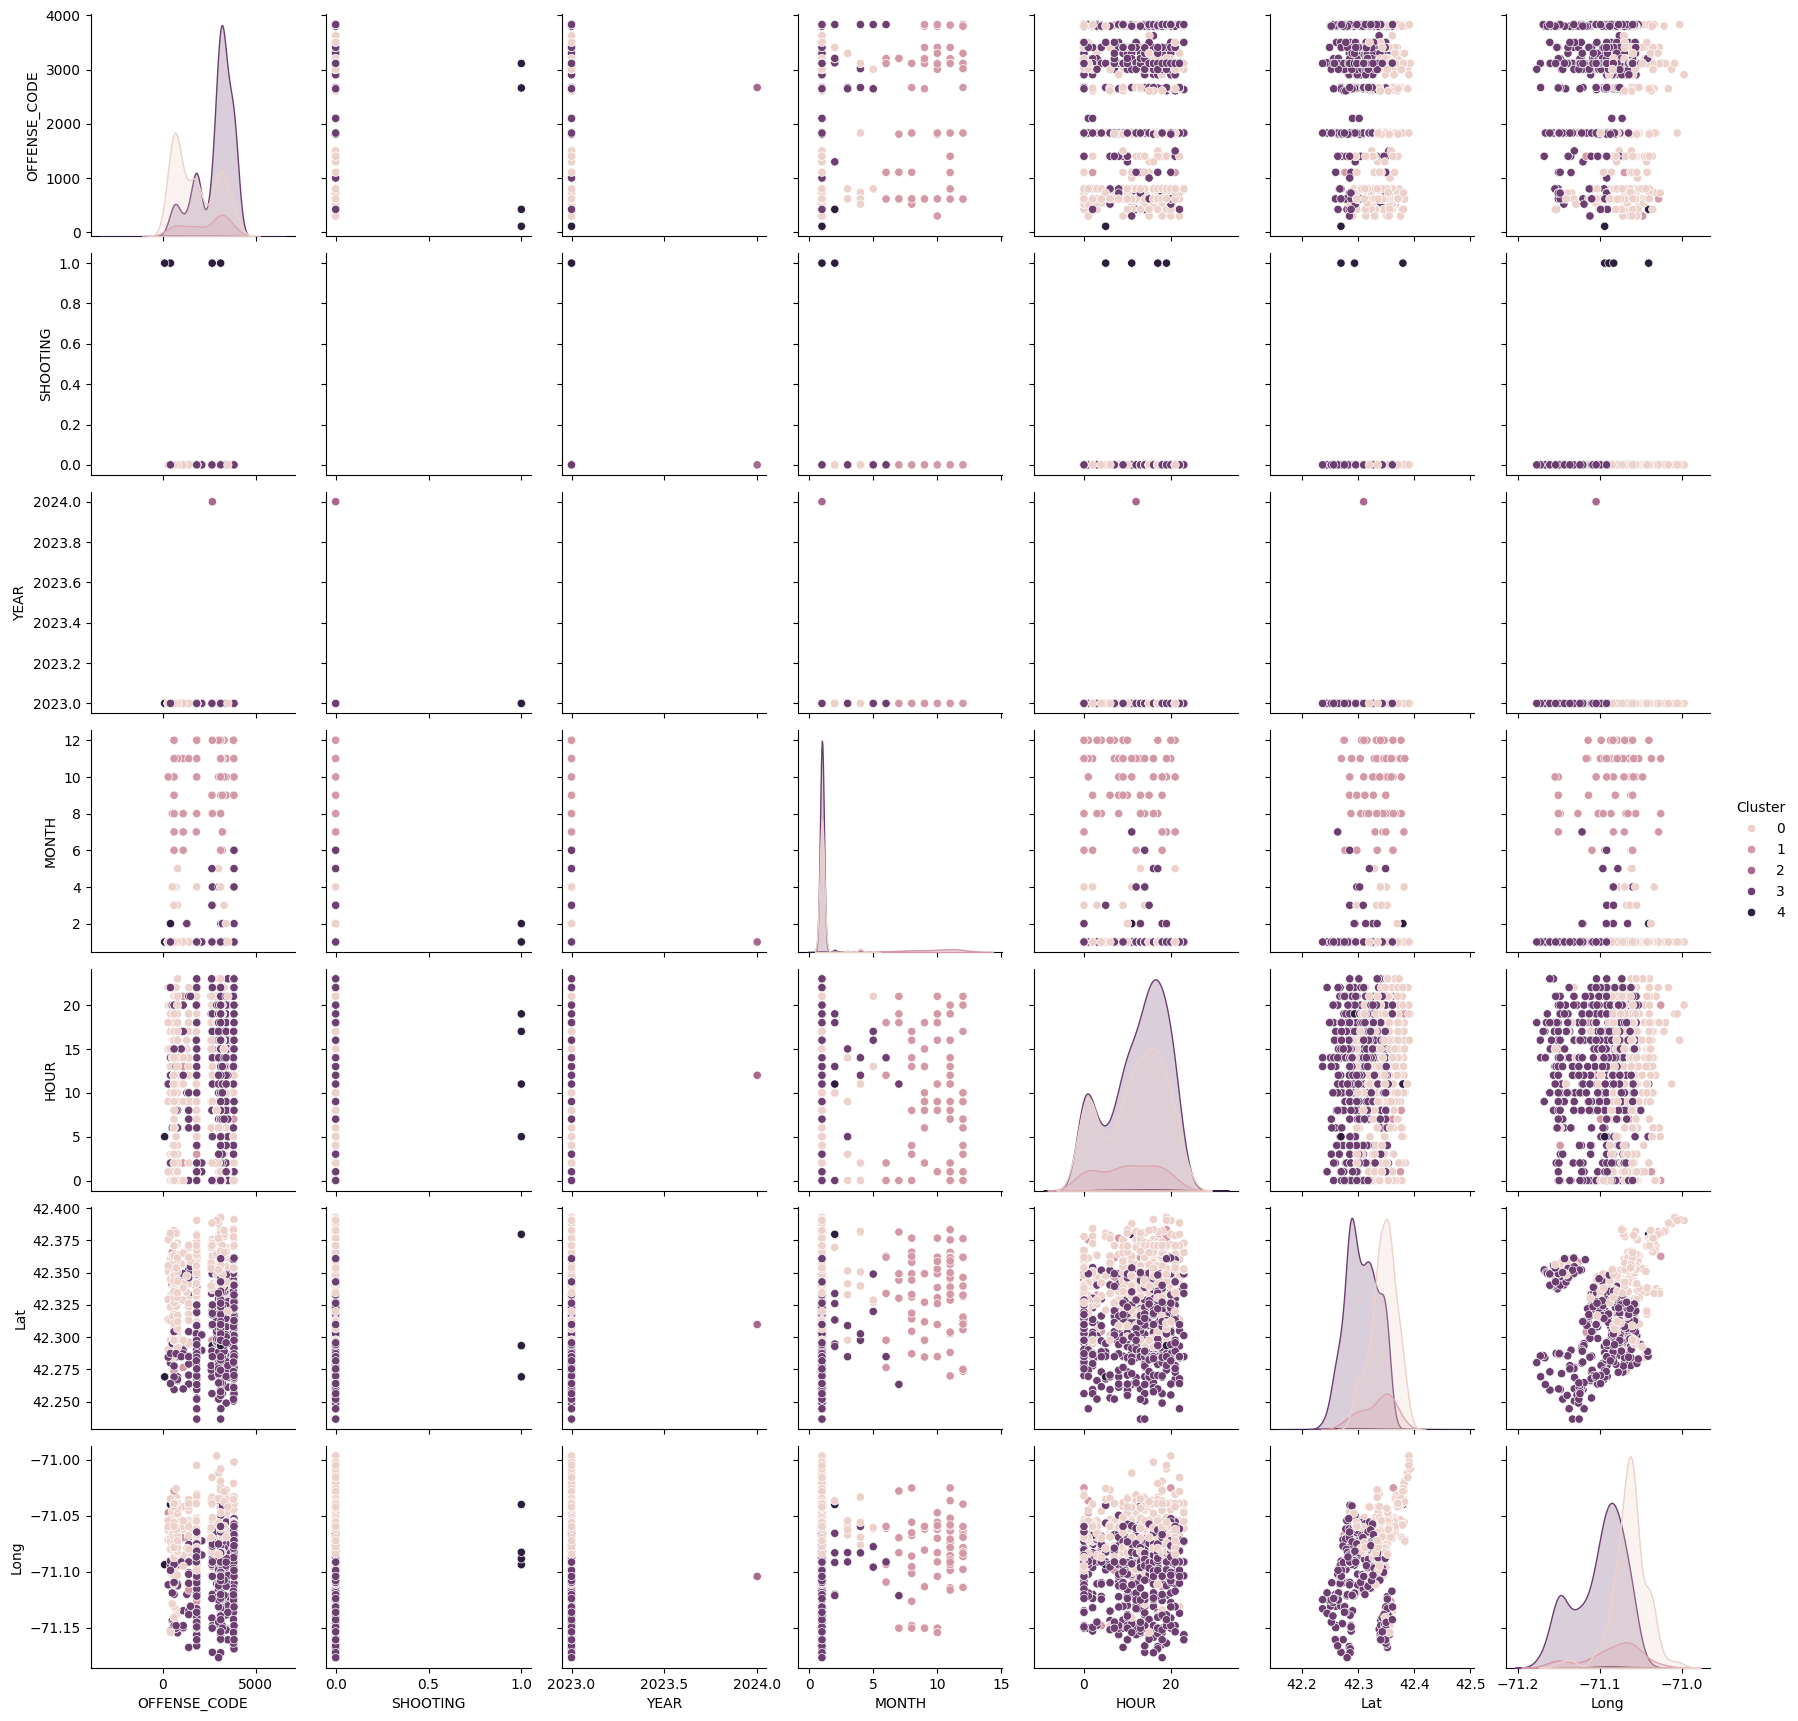

In [39]:
# Visualizing the clusters for selected features
import seaborn as sns
sns.pairplot(df, hue='Cluster', vars=['OFFENSE_CODE','SHOOTING', 'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long'])
plt.show()

#Agglomerative

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns

In [43]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

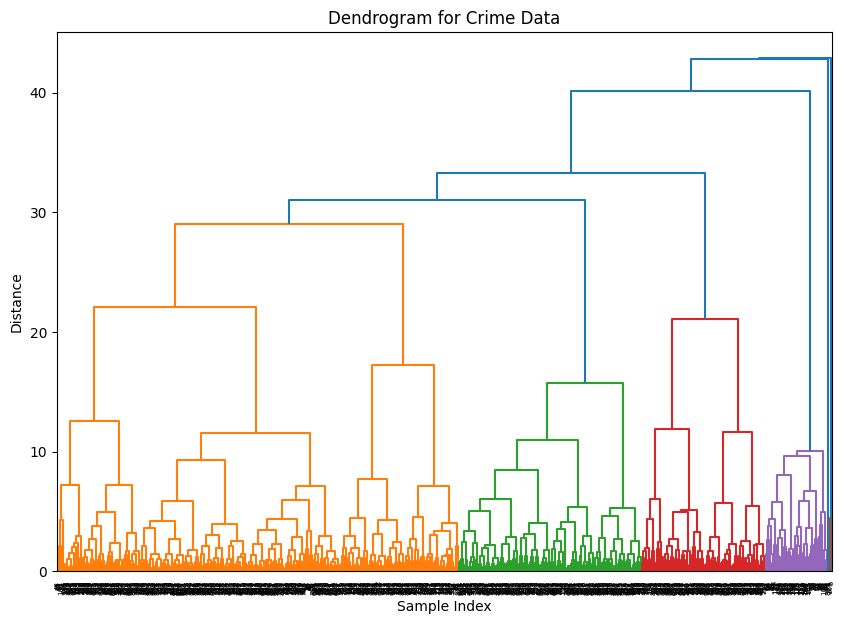

In [45]:
# Determine the number of clusters using a dendrogram
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Crime Data')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [47]:
# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = agg_cluster.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [48]:
# Evaluate the Clustering
silhouette_avg = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.808


In [50]:
# Analyze the Clusters
df['Cluster_agg'] = labels
print(df.groupby('Cluster_agg').mean())

             OFFENSE_CODE  SHOOTING                    OCCURRED_ON_DATE  \
Cluster_agg                                                               
0             2402.167763       0.0 2023-01-30 13:17:08.815789568+00:00   
1             1577.500000       1.0           2023-01-10 19:38:15+00:00   
2             2670.000000       0.0           2024-01-08 12:20:00+00:00   

               YEAR     MONTH       HOUR        Lat       Long   Cluster  \
Cluster_agg                                                                
0            2023.0  1.838816  11.891447  42.323868 -71.084503  1.645833   
1            2023.0  1.250000  13.000000  42.308871 -71.076331  4.000000   
2            2024.0  1.000000  12.000000  42.309718 -71.104295  2.000000   

             Cluster2  
Cluster_agg            
0                 0.0  
1                 1.0  
2                 2.0  


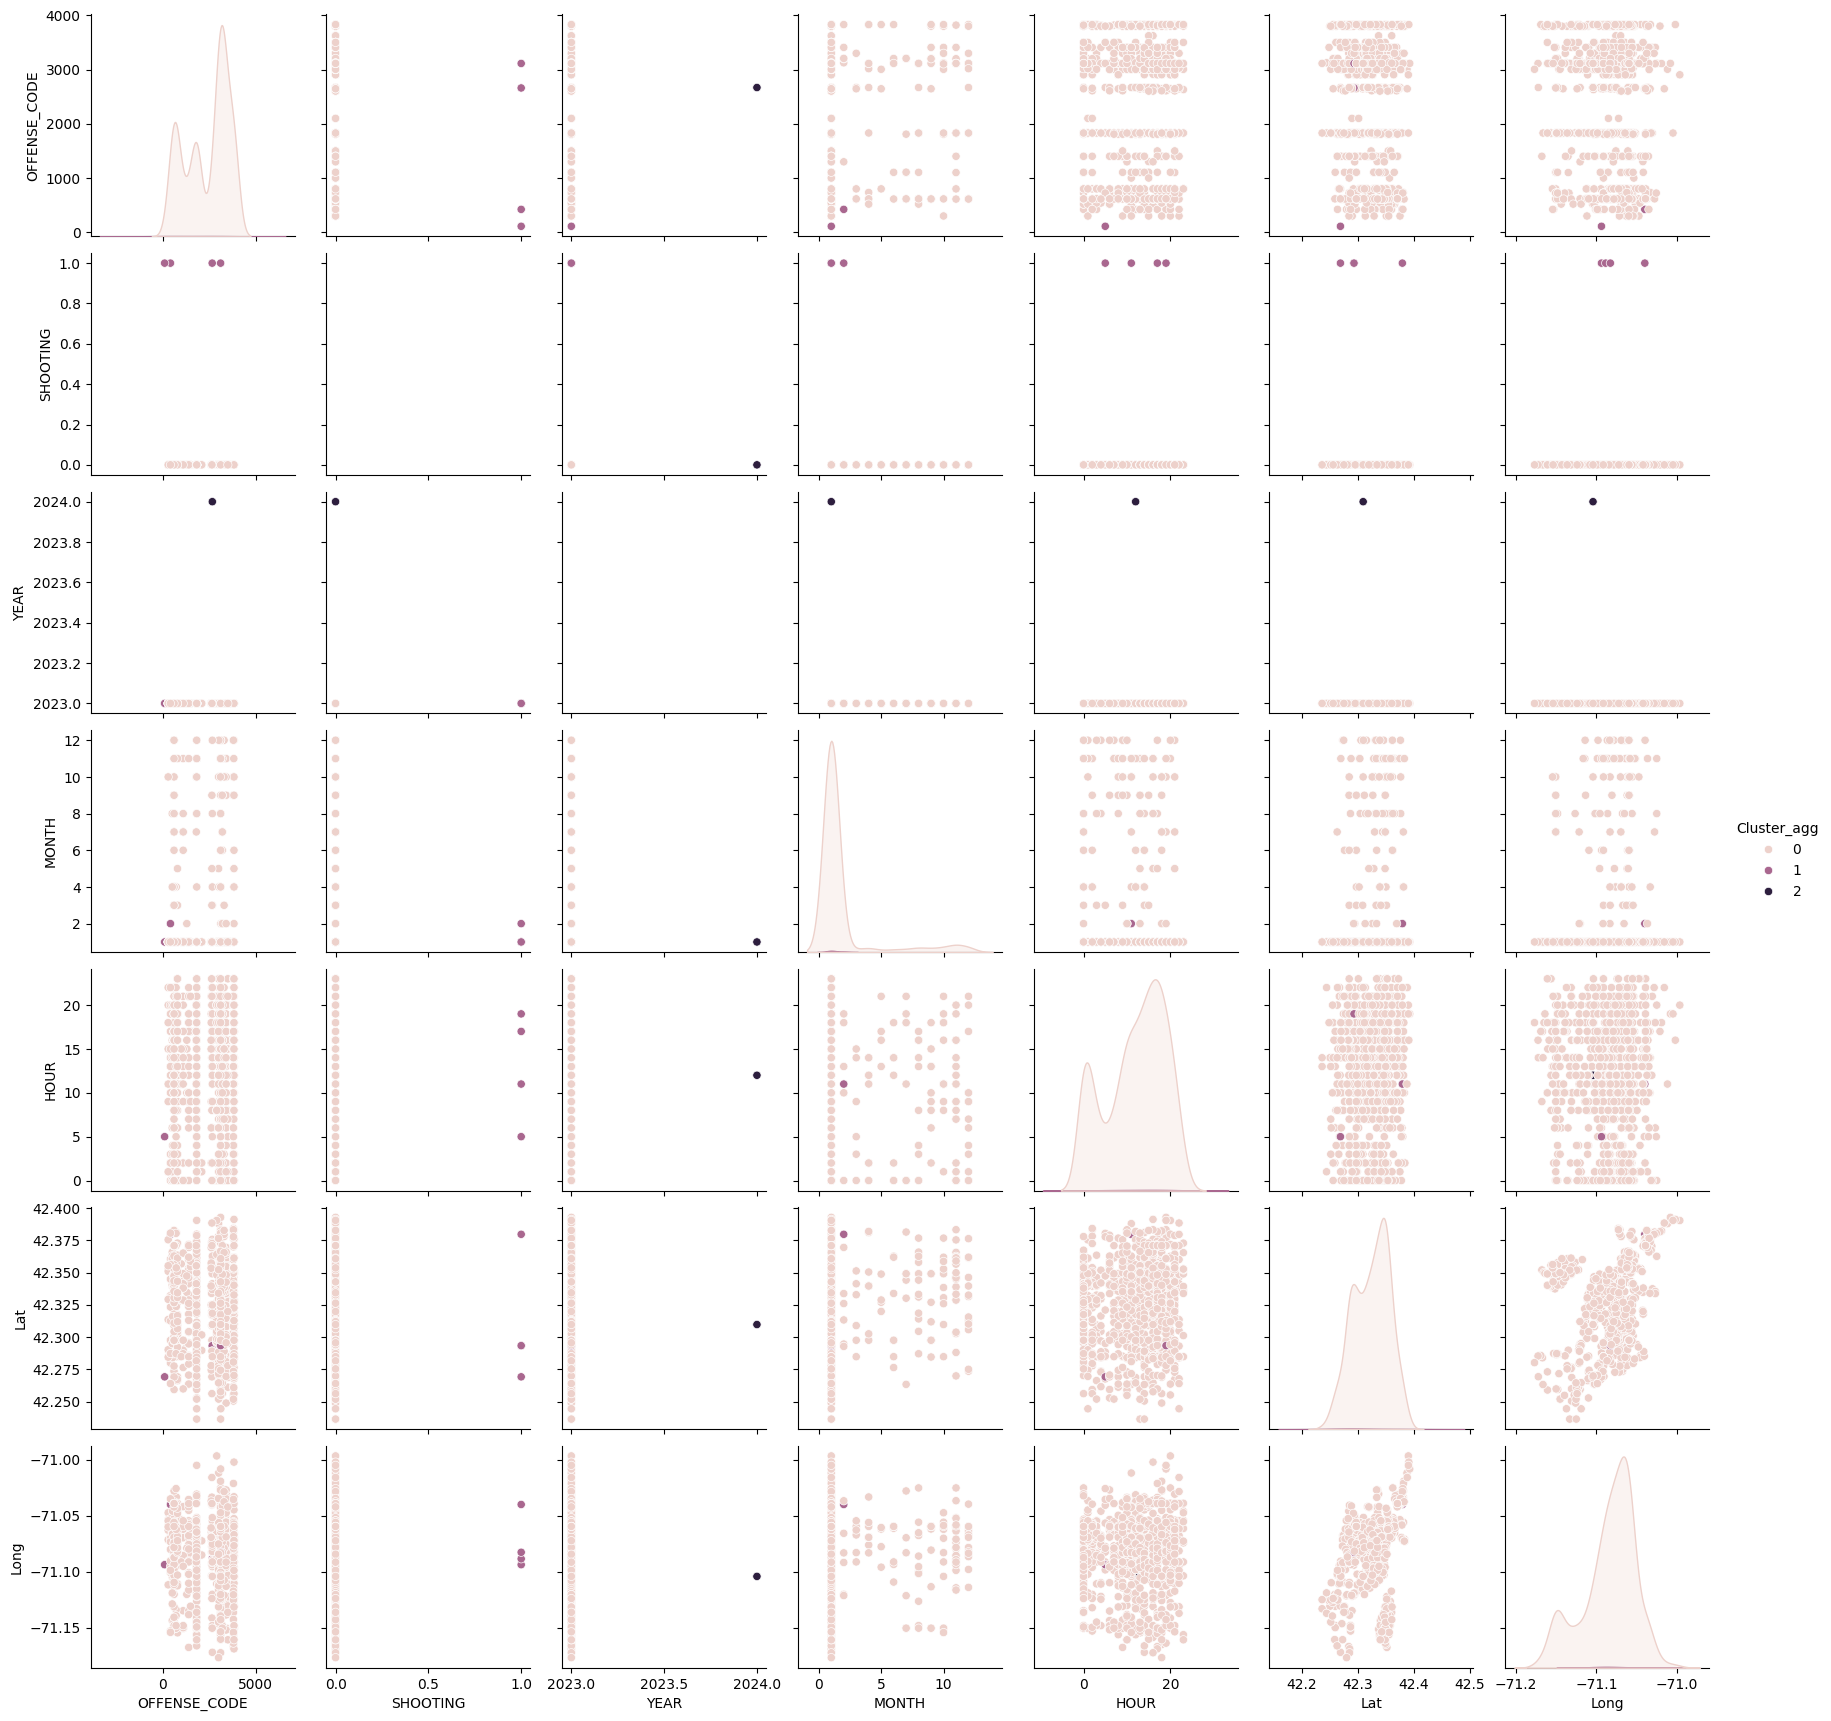

In [51]:
# Visualization and Interpretation
sns.pairplot(df, hue='Cluster_agg', vars=['OFFENSE_CODE','SHOOTING', 'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long'])
plt.show()